In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
import re

# Download NLTK data
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Reading the recipes CSV file into a DataFrame
recipes = pd.read_csv("/Users/pan/Desktop/dataanalytics/bodybuilding_nutrition_products.csv")

# Extracting specific columns from the DataFrame and storing them in separate variables
recipes_description = recipes['brand_name']

# Getting the first 10 rows of the column as a subset
subset_description = recipes_description.head(10)

# Convert the subset to a single string
text_description = '\n'.join(subset_description.astype(str))

# Tokenize the text
tokens = word_tokenize(text_description)

# Remove punctuation
tokens = [word for word in tokens if re.fullmatch('[a-zA-Z]+', word)]

# Convert to lower case
tokens = [word.lower() for word in tokens]

# Remove stopwords
stop_words = set(stopwords.words('english'))
tokens = [word for word in tokens if not word in stop_words]

# Lemmatize the tokens
lemmatizer = WordNetLemmatizer()
tokens = [lemmatizer.lemmatize(word) for word in tokens]

# Print the cleaned tokens
print(tokens)

/Users/pan/opt/miniconda3/lib/python3.8/site-packages/scipy/__init__.py:143: UserWarning: A NumPy version >=1.19.5 and <1.27.0 is required for this version of SciPy (detected version 1.19.1)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
[nltk_data] Downloading package punkt to /Users/pan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/pan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/pan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


['evlution', 'nutrition', 'optimum', 'nutrition', 'jym', 'supplement', 'science', 'optimum', 'nutrition', 'jym', 'supplement', 'science', 'muscletech', 'jym', 'supplement', 'science', 'evlution', 'nutrition', 'evlution', 'nutrition', 'bsn']


In [2]:
from nltk.tokenize import sent_tokenize

# Function to get the superordinate term (hypernym)
def get_hypernym(word):
    synsets = wordnet.synsets(word)
    if synsets:
        hypernyms = synsets[0].hypernyms()
        if hypernyms:
            return hypernyms[0].lemmas()[0].name()
    return word

# Function to process and replace words in a sentence with their superordinate terms
def replace_words_with_hypernyms(text):
    sentences = sent_tokenize(text)
    new_sentences = []
    for sentence in sentences:
        words = word_tokenize(sentence)
        new_words = [get_hypernym(word) if re.fullmatch('[a-zA-Z]+', word) else word for word in words]
        new_sentence = ' '.join(new_words)
        new_sentences.append(new_sentence)
    return ' '.join(new_sentences)

# Apply the replacement function to the cleaned text
cleaned_text = ' '.join(tokens)  # Convert the cleaned tokens back to a single string
new_text = replace_words_with_hypernyms(cleaned_text)

# Print the original cleaned text and the new text with words replaced by their superordinate terms
print("Original Cleaned Text:")
print(cleaned_text)
print("\nText with Words Replaced by Superordinate Terms:")
print(new_text)

Original Cleaned Text:
evlution nutrition optimum nutrition jym supplement science optimum nutrition jym supplement science muscletech jym supplement science evlution nutrition evlution nutrition bsn

Text with Words Replaced by Superordinate Terms:
evlution organic_process good organic_process jym matter discipline good organic_process jym matter discipline muscletech jym matter discipline evlution organic_process evlution organic_process bsn


In [3]:
import nltk
nltk.download('wordnet')
from nltk.corpus import wordnet as wn
# Function to get the list of synonyms for a given word
def get_synonyms(word):
    synonyms = []
    for syn in wn.synsets(word):
        for lemma in syn.lemmas():
            synonyms.append(lemma.name())
    return list(set(synonyms))

# Function to process and replace a specific word in the text with multiple words from a list
def replace_word_with_list(text, word_to_replace, replacement_words):
    new_texts = []
    for replacement_word in replacement_words:
        new_text = text.replace(word_to_replace, replacement_word)
        new_texts.append(new_text)
    return new_texts

# Get the synonyms of a specific sentiment word
sentiment_word = 'love'  # You can change this to any sentiment word present in the text
synonyms = get_synonyms(sentiment_word)

# Apply the replacement function to the cleaned text for the sentiment word
cleaned_text = ' '.join(tokens)  # Convert the cleaned tokens back to a single string
new_texts = replace_word_with_list(cleaned_text, sentiment_word, synonyms)

# Print the new texts with the sentiment word replaced by its synonyms
for new_text in new_texts:
    print(new_text)

evlution nutrition optimum nutrition jym supplement science optimum nutrition jym supplement science muscletech jym supplement science evlution nutrition evlution nutrition bsn
evlution nutrition optimum nutrition jym supplement science optimum nutrition jym supplement science muscletech jym supplement science evlution nutrition evlution nutrition bsn
evlution nutrition optimum nutrition jym supplement science optimum nutrition jym supplement science muscletech jym supplement science evlution nutrition evlution nutrition bsn
evlution nutrition optimum nutrition jym supplement science optimum nutrition jym supplement science muscletech jym supplement science evlution nutrition evlution nutrition bsn
evlution nutrition optimum nutrition jym supplement science optimum nutrition jym supplement science muscletech jym supplement science evlution nutrition evlution nutrition bsn
evlution nutrition optimum nutrition jym supplement science optimum nutrition jym supplement science muscletech jym

[nltk_data] Downloading package wordnet to /Users/pan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


(S (NP (N Stress)) (VP (V creates) (NP (N acne))))


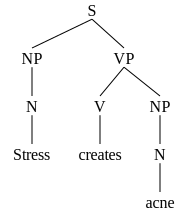

In [4]:
import nltk
from nltk import word_tokenize
import svgling
svgling.disable_nltk_png()
# Create a simplified CFG for the sentence "we love grits"
grammar = nltk.CFG.fromstring("""
S -> NP VP
NP -> N
VP -> V NP
N -> "Stress" | "acne"
V -> "creates"
""")

# Parse and visualize the sentence


sent = nltk.word_tokenize("Stress creates acne")
parser = nltk.ChartParser(grammar)
# parse the sentence
trees = list(parser.parse(sent))
# print a text-formatted parse tree
print(trees[0])
# print an SVG formatted parse tree
trees[0]

In [39]:
# use the rule-based matcher in spaCy to analyze a user’s utterance to find values for these slots.

import spacy
from spacy.lang.en import English

nlp = English()

ruler = nlp.add_pipe("entity_ruler")
ingredients_patterns = [
    {"label": "INGREDIENTS", "pattern": "carbohydrates",},
    {"label": "INGREDIENTS", "pattern": "fats"},
    {"label": "INGREDIENTS", "pattern": "minerals"},
    {"label": "INGREDIENTS", "pattern": "proteins"},
    {"label": "INGREDIENTS", "pattern": "vitamins"}]
atmosphere_patterns = [
    {"label": "ATMOSPHERE", "pattern": "energy"},
    {"label": "ATMOSPHERE", "pattern": "insulation"},
    {"label": "ATMOSPHERE", "pattern": "bone health"},
    {"label": "ATMOSPHERE", "pattern": "muscle development"},
    {"label": "ATMOSPHERE", "pattern": "overall well-being"}
]

ruler.add_patterns(ingredients_patterns)
ruler.add_patterns(atmosphere_patterns)

doc = nlp("A balanced diet should include a variety of nutrients such as carbohydrates for energy, fats for insulation, minerals for bone health, proteins for muscle development, vitamins for overall well-being, and water for hydration.")
print([(ent.text, ent.label_) for ent in doc.ents])

[('carbohydrates', 'INGREDIENTS'), ('energy', 'ATMOSPHERE'), ('fats', 'INGREDIENTS'), ('insulation', 'ATMOSPHERE'), ('minerals', 'INGREDIENTS'), ('bone health', 'ATMOSPHERE'), ('proteins', 'INGREDIENTS'), ('muscle development', 'ATMOSPHERE'), ('vitamins', 'INGREDIENTS'), ('overall well-being', 'ATMOSPHERE')]


In [40]:
# Slot visualization with displacy
from spacy import displacy
colors = {"INGREDIENTS": "#ea7e7e",
          "ATMOSPHERE": "#abcdef"}
options = {"ents": ["INGREDIENTS","ATMOSPHERE"], "colors": colors}
displacy.render(doc, style="ent", options=options,jupyter = True)